### Question 2.1

In [93]:
# This function creates N draws from some three random variables
import numpy as np

def draw_returns(N):

    # coin flips
    normal_year = np.random.binomial(1, 0.9, N)

    # draw for normal years
    mu = np.array([0.05, 0.05, 0.05])
    Sigma = np.array([[0.09, 0.012, 0.021], [0.012, 0.16, 0.028], [0.021, 0.028, 0.49]])
    normal_ret = np.random.multivariate_normal(mu, Sigma, N)

    # draws for special years
    mu = np.array([-0.1, -0.1, -0.1])
    Sigma = np.array([[0.36, 0.24, 0.42], [0.24, 0.64, 0.56], [0.42, 0.56, 1.96]])
    special_ret = np.random.multivariate_normal(mu, Sigma, N)

    # combine
    ret = normal_ret
    for i in range(N):
        if normal_year[i] == 0:
            ret[i,:] = special_ret[i,:]

    return(ret)

In [94]:
N = 100000
returns = draw_returns(N)
alpha = 0.01
weights = np.array([2, 6, 2])
portfolio_returns = np.sum(weights * returns/100, axis=1)
portfolio_VaR = -np.percentile(portfolio_returns, alpha*100)*1e6
portfolio_VaR

104820.94593038467

In [95]:
weightsA = np.array([2+1/1e6, 6, 2])
portfolio_returnsA = np.sum(weightsA * returns/100, axis=1)
VaRA = -np.percentile(portfolio_returnsA, alpha*100)*1e6
DVaRA=VaRA-portfolio_VaR
CVaRA=DVaRA*2
print("Asset A - DVaR: {:.6f}, CVaR: {:.6f}".format(DVaRA, CVaRA))

Asset A - DVaR: 0.007469, CVaR: 0.014938


In [96]:
weightsB = np.array([2, 6+1/1e6, 2])
portfolio_returnsB = np.sum(weightsB * returns/100, axis=1)
VaRB = -np.percentile(portfolio_returnsB, alpha*100)*1e6
DVaRB=VaRB-portfolio_VaR
CVaRB=DVaRB*6
print("Asset B - DVaR: {:.6f}, CVaR: {:.6f}".format(DVaRB, CVaRB))

Asset B - DVaR: 0.013468, CVaR: 0.080811


In [97]:
weightsC = np.array([2, 6, 2+1/1e6])
portfolio_returnsC = np.sum(weightsC * returns/100, axis=1)
VaRC = -np.percentile(portfolio_returnsC, alpha*100)*1e6
DVaRC=VaRC-portfolio_VaR
CVaRC=DVaRC*2
print("Asset C - DVaR: {:.6f}, CVaR: {:.6f}".format(DVaRC, CVaRC))

Asset C - DVaR: 0.004536, CVaR: 0.009072


In [98]:
sum_CVaR=(CVaRA+CVaRB+CVaRC)*1e6
print("Sum of CVaRs: {:.2f}".format(sum_CVaR))

Sum of CVaRs: 104820.95


Asset B is respobsible for most risk.Asset B is responsible for the most risk of the portfolio because it has the highest contribution to the portfolio CVaR. This means that a small change in the returns of Asset B could have a large impact on the overall risk of the portfolio.

### Question 2.2

When we approximate the derivatives involved in DVaR and CVaR by using finite differences, the size of the position change used can affect the accuracy of the approximation.

If we use a very small position change, the approximation may be more accurate, but it can be sensitive to numerical errors due to rounding and precision limitations. On the other hand, if we use a very large position change, the approximation may be less accurate, and we may miss important features of the function, such as curvature and non-linearity.

In general, a good approach is to use a small enough position change that provides a reasonable approximation while avoiding numerical errors.

In [99]:
N = 1000
alpha = 0.01
weights = np.array([2, 6, 2])
portfolio_VaRs = []
for i in range(N):
    returns = draw_returns(i)
    portfolio_returns = np.sum(weights * returns/100, axis=0)
    portfolio_VaR = -np.percentile(portfolio_returns, alpha*100)*1e6
    portfolio_VaRs.append(portfolio_VaR)

In [100]:
N = 1000
alpha = 0.01
weights1 = np.array([2+1/1e6, 6, 2])
portfolio_VaR1s = []
for i in range(N):
    returns1 = draw_returns(i)
    portfolio_returns1 = np.sum(weights1 * returns1/100, axis=0)
    portfolio_VaR1 = -np.percentile(portfolio_returns1, alpha*100)*1e6
    portfolio_VaR1s.append(portfolio_VaR1)

Text(0, 0.5, 'Portfolio change in VaR ($)')

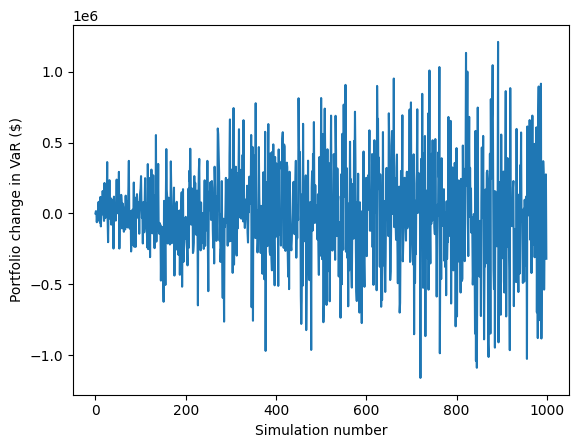

In [101]:
import matplotlib.pyplot as plt
portfolio_VaRs= np.array(portfolio_VaRs)
portfolio_VaR1s=np.array(portfolio_VaR1s)
DVaRs=portfolio_VaR1s-portfolio_VaRs
plt.plot(DVaRs)
plt.xlabel('Simulation number')
plt.ylabel('Portfolio change in VaR ($)')

Text(0, 0.5, 'Portfolio change in VaR ($)')

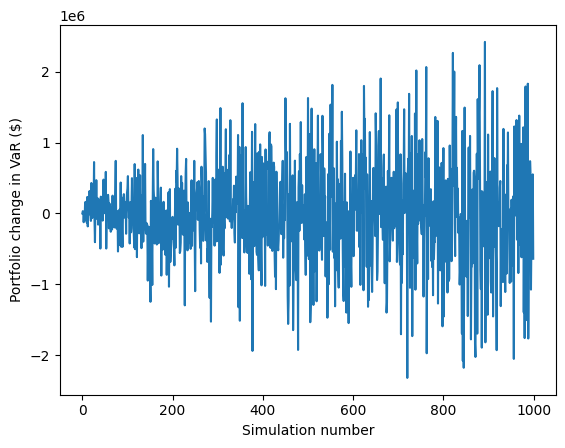

In [102]:
CVaRs=DVaRs*2
plt.plot(CVaRs)
plt.xlabel('Simulation number')
plt.ylabel('Portfolio change in VaR ($)')

### Question 2.3

In [103]:
N = 100000
returns3 = draw_returns(N)
alpha = 0.01
weights3 = np.array([3, 5, 2])
portfolio_returns3 = np.sum(weights3 * returns3/100, axis=1)
portfolio_VaR3 = -np.percentile(portfolio_returns3, alpha*100)*1e6
weights3C = np.array([3, 5, 2+1/1e6])
portfolio_returns3C = np.sum(weights3C * returns3/100, axis=1)
VaR3C = -np.percentile(portfolio_returns3C, alpha*100)*1e6
DVaR3C=VaR3C-portfolio_VaR3
CVaR3C=DVaR3C*2
print("Asset C - DVaR: {:.6f}, CVaR: {:.6f}".format(DVaRC, CVaRC))

Asset C - DVaR: 0.004536, CVaR: 0.009072


### Question 3.1

In [104]:
import scipy.stats

def calc_VaR(mu, sigma, W, c):
    z_score = scipy.stats.norm.ppf(1-c)
    mu_v = mu*W
    sigma_v = sigma*W
    VaR = -(mu_v + z_score * sigma_v)*1e6
    return VaR

c = 0.99
mu1, sigma1, W01 = 0.0001, 0.004, 150*0.9163
VaR1 = calc_VaR(mu1, sigma1, W01, c)
print(VaR1)

mu2, sigma2, W02 = 0.00015, 0.003, 50*1.3599
VaR2 = -calc_VaR(mu2, sigma2, W02, 1-c)
print(VaR2)


1265235.0341901733
484739.32108622097


### Question 3.2

In [105]:
rho=0.6
VaR_combined=np.sqrt(VaR1**2+VaR2**2+2*VaR1*VaR2*rho)
VaR_combined

1603671.6954959189